In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv")
df.shape

(32, 12)

In [3]:
X = torch.tensor(df.wt.values,dtype=torch.float32)
y = torch.tensor(df.mpg.values,dtype=torch.float32)
x_np = np.array(X)
y_np = np.array(y)
X,y,x_np,y_np

(tensor([2.6200, 2.8750, 2.3200, 3.2150, 3.4400, 3.4600, 3.5700, 3.1900, 3.1500,
         3.4400, 3.4400, 4.0700, 3.7300, 3.7800, 5.2500, 5.4240, 5.3450, 2.2000,
         1.6150, 1.8350, 2.4650, 3.5200, 3.4350, 3.8400, 3.8450, 1.9350, 2.1400,
         1.5130, 3.1700, 2.7700, 3.5700, 2.7800]),
 tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000, 18.1000, 14.3000, 24.4000,
         22.8000, 19.2000, 17.8000, 16.4000, 17.3000, 15.2000, 10.4000, 10.4000,
         14.7000, 32.4000, 30.4000, 33.9000, 21.5000, 15.5000, 15.2000, 13.3000,
         19.2000, 27.3000, 26.0000, 30.4000, 15.8000, 19.7000, 15.0000, 21.4000]),
 array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
        3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
        1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
        1.513, 3.17 , 2.77 , 3.57 , 2.78 ], dtype=float32),
 array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 1

<AxesSubplot:>

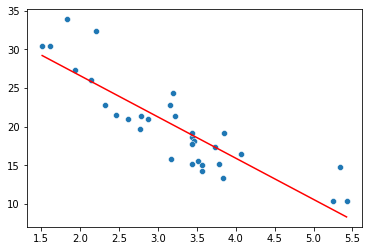

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_np.reshape(-1,1),y_np)
# sns.regplot(data=df)
y_sk = regressor.coef_[0]*x_np + regressor.intercept_
sns.scatterplot(x=x_np,y=y_np)
sns.lineplot(x=x_np,y=y_sk,color="red")


In [5]:
class LinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self,X):
        pred = self.linear(X)
        return pred

In [6]:
model = LinearReg()
lr = 0.02
epochs = 1000

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

losses = []
slopes =[]
biases=[]
batch_size = 2

for epoch in range(epochs):
    for i in range(0, X.reshape(-1,1).shape[0], batch_size):
        optimizer.zero_grad()

        #fwd pass
        pred = model(X.reshape(-1,1)[i:i+batch_size])

        # loss
        loss = loss_func(pred,y[i:i+batch_size])
        loss.backward()
        #bwd pass
        optimizer.step()

        losses.append(loss.item())
        for name, params in model.named_parameters():
            if params.requires_grad:
                if name == "linear.weight":
                    slopes.append(params.data.numpy()[0][0])
                if name == "linear.bias":
                    biases.append(params.data.numpy()[0])
        
    if((epoch+1)%100==0):
        print(f"Epoch:{epoch+1}, Loss:{loss}")

d:\Software\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:100, Loss:14.287769317626953
Epoch:200, Loss:14.342024803161621
Epoch:300, Loss:14.342818260192871
Epoch:400, Loss:14.342824935913086
Epoch:500, Loss:14.342824935913086
Epoch:600, Loss:14.342824935913086
Epoch:700, Loss:14.342824935913086
Epoch:800, Loss:14.342824935913086
Epoch:900, Loss:14.342824935913086
Epoch:1000, Loss:14.342824935913086


In [7]:
len(losses),len(range(epochs))

(16000, 1000)

<AxesSubplot:>

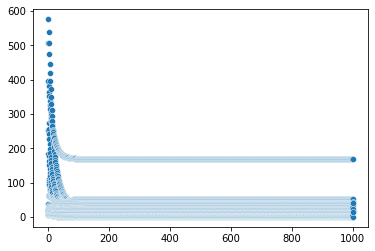

In [9]:
x_range = np.arange(0,epochs,batch_size/df.shape[0])
val = 16
sns.scatterplot(x=x_range,y=losses)

<AxesSubplot:>

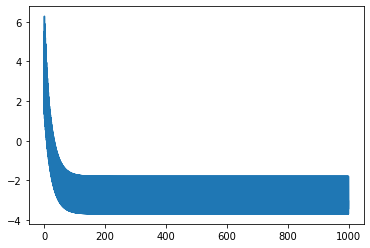

In [10]:
sns.lineplot(x=x_range,y=slopes)